# Mnist classification

### Exercise objectives
- Implement a CNN architecture with convolution layers
- Run a Neural Network on images

<hr>
<hr>

Let's imagine for a moment that you are working for the postal office (and you're in 1970 / 1980). You deal everyday with a enourmous amont of letters, and you want to automate the process of reading the numbers that have been handwritten. This task, called the _Handwriting Recognition_, has been a very complex that has been handled by Bell Labs (among other) where Yann Le Cun used to work, and where such things have been developed : 

![Number recognition](recognition.gif)


The idea is that you have an image (not a video: the animation is here to present what happens with different images) as an input and you try to predict the figure on the image - it corresponds to a classification task, where the output is the class (=figure) the image belongs to, from 0 to 9.

This task used to be quite complex back in the time, and still is a benchmark on which a lot of people work. For this reason, the MNIST (for *Modified ou Mixed National Institute of Standards and Technology*) dataset has been created: it corresponds to digit images, from 0 to 9. 

You goal in this notebook is to build a Convolution Neural Network that can work on such images and predict the corresponding class of each digit image. Keep in mind that this CNN will make you classify hand-written digits, which was a very complex task till the 90's. 

## The data

Keras provides multiple datasets within the Python package. You can load it with the following commands:

In [31]:
from tensorflow.keras import datasets
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import tensorflow as tf
import matplotlib.colors as mcolors
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data(path="mnist.npz")

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

❓ Question ❓ Let's look at some of the data. 

Select some of the values of the train set and plot them thanks to the `imshow` function from matplotlib with `cmap` set to `gray`(otherwise, the displayed colors are just some arrangement Matplotlib does, which does not exist in practice).

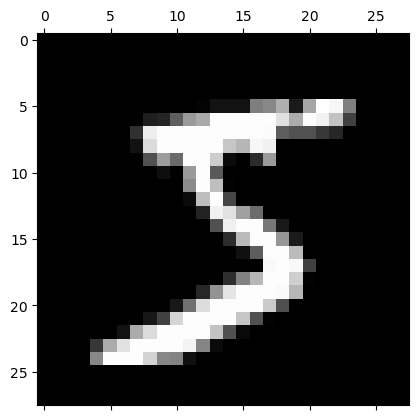

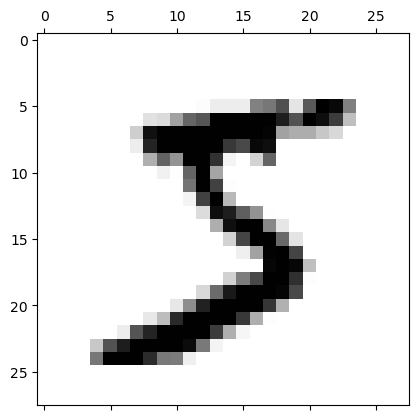

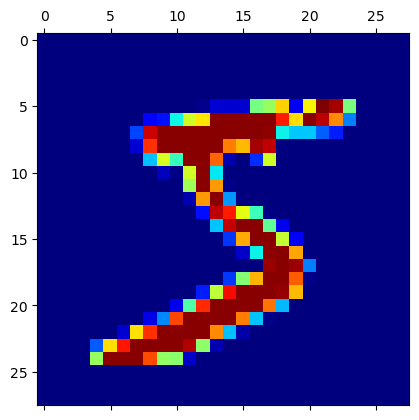

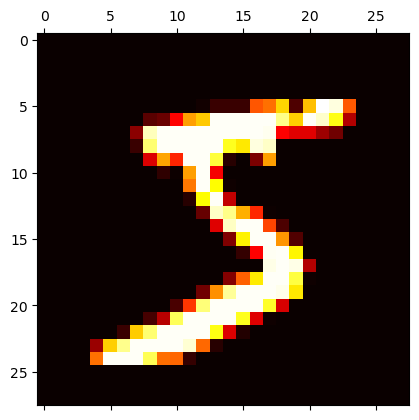

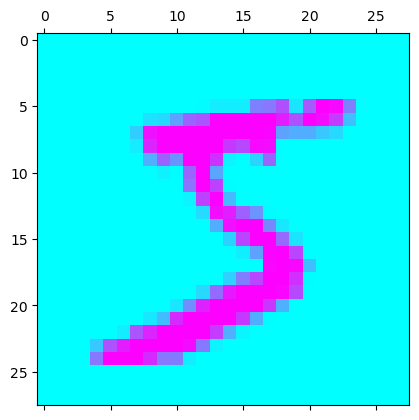

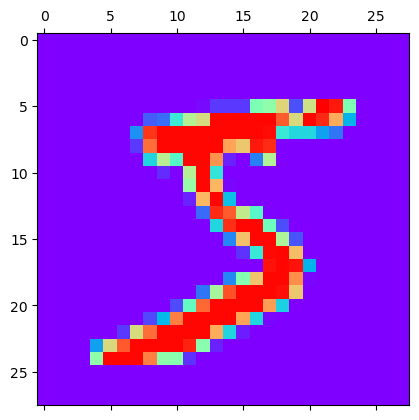

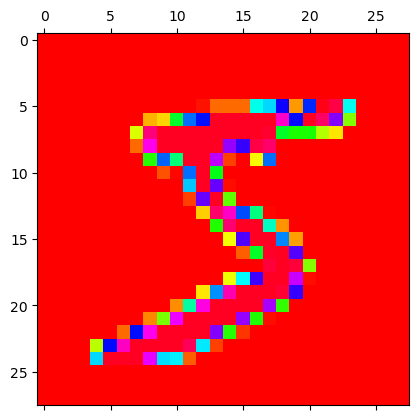

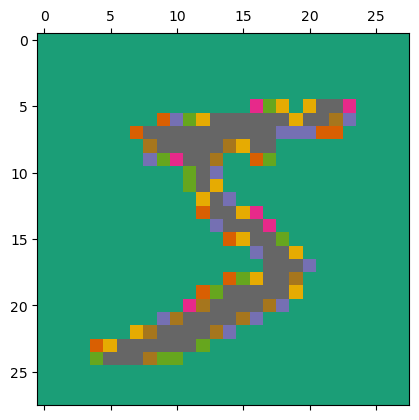

In [5]:
cmaps = ['gray','binary','jet','hot','cool','rainbow','hsv','Dark2']
for i in cmaps :
    plt.matshow(X_train[0],cmap=i)

In [7]:
# Define the colors and position of the color segments
color_dict = {'red':  [(0.0,  1.0, 1.0),
                      (0.25,  0.0, 0.0),
                      (1.0,  0.0, 0.0)],
              'green': [(0.0,  0.0, 0.0),
                      (0.5,  1.0, 1.0),
                      (1.0,  0.0, 0.0)],
              'blue':  [(0.0,  0.0, 0.0),
                      (0.75,  0.0, 0.0),
                      (1.0,  1.0, 1.0)]}

# Create the colormap using the color dictionary
justine_colormap = mcolors.LinearSegmentedColormap('justine_colormap', color_dict)

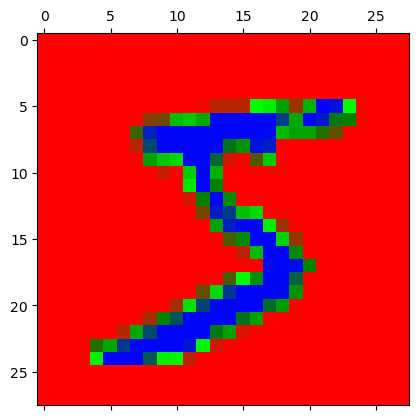

In [9]:
plt.matshow(X_train[0],cmap=justine_colormap)

In [10]:
# Update the color dictionary with new RGB values
color_dict['red'] = [(0.0,  0.0, 0.0),
                    (0.25,  1.0, 1.0),
                    (1.0,  1.0, 1.0)]
color_dict['green'] = [(0.0,  1.0, 1.0),
                      (0.5,  0.0, 0.0),
                      (1.0,  1.0, 1.0)]
color_dict['blue'] = [(0.0,  1.0, 1.0),
                      (0.75,  0.0, 0.0),
                      (1.0,  0.0, 0.0)]

# Recreate the colormap using the updated color dictionary
justine_colormap = mcolors.LinearSegmentedColormap('justine_colormap', color_dict)

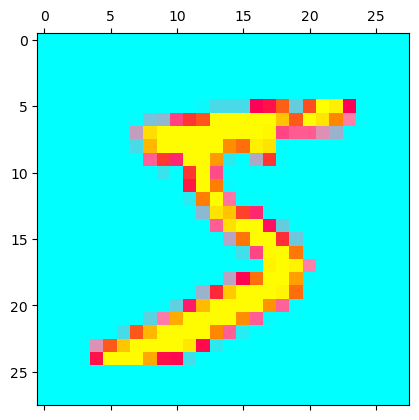

In [11]:
plt.matshow(X_train[0],cmap=justine_colormap)

Remember that neural networks converge faster when the input data are somehow normalized? It goes similarly for input images. 

❓ Question ❓ As a first preprocessing step, you should normalize your data. For images, it simply implies to divide your input data by the maximal value, i.e. 255. Don't forget to do it on your train and test data.

(N.B.: you can also centered your data, by substracting 0.5 but it is not mandatory). 

In [12]:
X_train.shape

(60000, 28, 28)

In [13]:
X_train_norm = X_train/ 255

In [14]:
X_test_norm = X_test / 255

❓ Question ❓ What is the shape of your images?

In [15]:
X_train_norm.shape

(60000, 28, 28)

In [16]:
X_test_norm.shape

(10000, 28, 28)

You see that you have 60.000 training images, all of size (28, 28). However, Keras needs images whose last dimension is the number of channels, which is missing here.

❓ Question ❓ Use the `expand_dims` to add one dimension at the end of the training and test data. Then, print the shape of X_train and X_test that should respectively be (60000, 28, 28, 1) and (10000, 28, 28, 1).

In [17]:
X_train_norm = tf.expand_dims(X_train_norm, axis = -1)
X_train_norm.shape

2023-01-25 12:42:37.069913: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


TensorShape([60000, 28, 28, 1])

In [18]:
X_test_norm = tf.expand_dims(X_test_norm, axis = -1)
X_test_norm.shape

TensorShape([10000, 28, 28, 1])

A last thing to do to prepare your data is to convert your labels to one-hot encoded categories.

❓ Question ❓ Use `to_categorical` to transform your labels. Store the results in `y_train_cat` and `y_test_cat`.

In [19]:
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes=10)

In [20]:
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [21]:
y_train_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [22]:
y_train_cat.shape

(60000, 10)

The data are now ready to be used.

## The Convolutional Neural Network _aka_ CNN

Now, build a Convolutional Neural Network. 

❓ Question ❓ Based on the course, build a neural network that has:
- a `Conv2D` layer with 8 filters, each of size (4, 4), with an input shape suitable for your task, the relu activation function, and padding='same' so as to 
- a `MaxPool2D` layer with a pool_size of (2, 2)
- a second `Conv2D` layer with 16 filters, each of size (3, 3), and the relu activation function
- a second `MaxPool2D` layer with a pool_size of (2, 2)
- a `Flatten` layer
- a first `Dense` layer with 10 neurons and the relu activation function
- a last layer that is suited for your task

In the function, do not forget to include the compilation of the model, which optimizes the `categorical_crossentropy` with the adam optimizer - and the accuracy should be among the metrics.

In [24]:
def initialize_model():
    
    model = models.Sequential()
    
    ### First convolution & max-pooling
    # To complete
    
    model.add(layers.Conv2D(8, (4, 4), activation='relu', padding='same',input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
   
    
    ### Second convolution & max-pooling
    # To complete

    model.add(layers.Conv2D(16, (3, 3),activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
      
    ### Flattening
    # To complete
    
    model.add(layers.Flatten())

    ### One fully connected
    # To complete
    
    model.add(layers.Dense(10, activation='relu' ))


    ### Last layer (let's say a classification with 10 output)
    # To complete
    
   
    model.add(layers.Dense(10, activation='softmax'))
    
    ### Model compilation
    # To complete
    model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

    return model

model = initialize_model()

❓ Question ❓ How many trainable parameters are there in your model?
- Compute them with `model.summary()` first
- Recompute them manually layer per layer then

In [25]:
 model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         136       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7

In [26]:
# filtres(8)*taille(4*4)+biais(+8)
layer_1 = 8*4*4+8
layer_1

136

In [27]:
# filtres(16)*taille(3*3)*entrée(8)+biais(16)
layer_2 = 16*3*3*8+16
layer_2

1168

In [28]:
# taille(7*7)*entrée(16)*sortie(10)+biais(10)
layer_3 = 7*7*16*10+10
layer_3

7850

In [29]:
# entrée(10)+sortie(10)+bias(10)
layer_4 = 10*10+10
layer_4 

110

In [30]:
tot = layer_1 + layer_2 + layer_3 + layer_4 
tot

9264

❓ Question ❓ Initialize your model and fit it on the train data. 
- Do not forget to use a validation set and an early stopping criterion. 
- Limit at 5 epoch max in this challenge (just to save time)

In [32]:
es = EarlyStopping(patience=10, restore_best_weights=True)

results = model.fit(X_train_norm, y_train_cat, batch_size=32, epochs=500, validation_split=0.3,
            callbacks=[es], verbose=1)

Epoch 1/500
1313/1313 [==============================] - 10s 7ms/step - loss: 0.4403 - accuracy: 0.8582 - val_loss: 0.1584 - val_accuracy: 0.9501
Epoch 2/500
1313/1313 [==============================] - 10s 7ms/step - loss: 0.1133 - accuracy: 0.9659 - val_loss: 0.1026 - val_accuracy: 0.9676
Epoch 3/500
1313/1313 [==============================] - 10s 7ms/step - loss: 0.0836 - accuracy: 0.9739 - val_loss: 0.0831 - val_accuracy: 0.9737
Epoch 4/500
1313/1313 [==============================] - 10s 7ms/step - loss: 0.0697 - accuracy: 0.9782 - val_loss: 0.0702 - val_accuracy: 0.9779
Epoch 5/500
1313/1313 [==============================] - 10s 8ms/step - loss: 0.0591 - accuracy: 0.9813 - val_loss: 0.0717 - val_accuracy: 0.9773
Epoch 6/500
1313/1313 [==============================] - 10s 8ms/step - loss: 0.0523 - accuracy: 0.9836 - val_loss: 0.0659 - val_accuracy: 0.9796
Epoch 7/500
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0449 - accuracy: 0.9859 - val_loss: 0.0672 - 

You probably see that the model converges within few epochs. The reason is that there are as many weight update as there are batches within each epoch. For instance, if you batch_size is of 32, you have 60.000/32 = 1875 updates.


❓ Question ❓ What is your accuracy on the test set?

The final accurency on the test set is : 0.9876

### You should be already impressed by your skills! You solved what was a very hard problem 30 years ago with your CNN.

🏁 Congratulation!
